In [113]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
people_df=pd.read_csv('people.sample.csv')
crash_df=pd.read_csv('crashes.sample2020.csv')
vehicle_df=pd.read_csv('vehicles.sample.csv')

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21,40,41,42,44,48,49,50,58,59,61) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#describing data
print(people_df.columns.values)

['PERSON_ID' 'PERSON_TYPE' 'CRASH_RECORD_ID' 'RD_NO' 'VEHICLE_ID'
 'CRASH_DATE' 'SEAT_NO' 'CITY' 'STATE' 'ZIPCODE' 'SEX' 'AGE'
 'DRIVERS_LICENSE_STATE' 'DRIVERS_LICENSE_CLASS' 'SAFETY_EQUIPMENT'
 'AIRBAG_DEPLOYED' 'EJECTION' 'INJURY_CLASSIFICATION' 'HOSPITAL'
 'EMS_AGENCY' 'EMS_RUN_NO' 'DRIVER_ACTION' 'DRIVER_VISION'
 'PHYSICAL_CONDITION' 'PEDPEDAL_ACTION' 'PEDPEDAL_VISIBILITY'
 'PEDPEDAL_LOCATION' 'BAC_RESULT' 'BAC_RESULT_VALUE' 'CELL_PHONE_USE']


In [7]:
print(crash_df.columns.values)

['CRASH_RECORD_ID' 'RD_NO' 'CRASH_DATE_EST_I' 'CRASH_DATE'
 'POSTED_SPEED_LIMIT' 'TRAFFIC_CONTROL_DEVICE' 'DEVICE_CONDITION'
 'WEATHER_CONDITION' 'LIGHTING_CONDITION' 'FIRST_CRASH_TYPE'
 'TRAFFICWAY_TYPE' 'LANE_CNT' 'ALIGNMENT' 'ROADWAY_SURFACE_COND'
 'ROAD_DEFECT' 'REPORT_TYPE' 'CRASH_TYPE' 'INTERSECTION_RELATED_I'
 'NOT_RIGHT_OF_WAY_I' 'HIT_AND_RUN_I' 'DAMAGE' 'DATE_POLICE_NOTIFIED'
 'PRIM_CONTRIBUTORY_CAUSE' 'SEC_CONTRIBUTORY_CAUSE' 'STREET_NO'
 'STREET_DIRECTION' 'STREET_NAME' 'BEAT_OF_OCCURRENCE' 'PHOTOS_TAKEN_I'
 'STATEMENTS_TAKEN_I' 'DOORING_I' 'WORK_ZONE_I' 'WORK_ZONE_TYPE'
 'WORKERS_PRESENT_I' 'NUM_UNITS' 'MOST_SEVERE_INJURY' 'INJURIES_TOTAL'
 'INJURIES_FATAL' 'INJURIES_INCAPACITATING' 'INJURIES_NON_INCAPACITATING'
 'INJURIES_REPORTED_NOT_EVIDENT' 'INJURIES_NO_INDICATION'
 'INJURIES_UNKNOWN' 'CRASH_HOUR' 'CRASH_DAY_OF_WEEK' 'CRASH_MONTH'
 'LATITUDE' 'LONGITUDE' 'LOCATION']


In [8]:
print(vehicle_df.columns.values)

['CRASH_UNIT_ID' 'CRASH_RECORD_ID' 'RD_NO' 'CRASH_DATE' 'UNIT_NO'
 'UNIT_TYPE' 'NUM_PASSENGERS' 'VEHICLE_ID' 'CMRC_VEH_I' 'MAKE' 'MODEL'
 'LIC_PLATE_STATE' 'VEHICLE_YEAR' 'VEHICLE_DEFECT' 'VEHICLE_TYPE'
 'VEHICLE_USE' 'TRAVEL_DIRECTION' 'MANEUVER' 'TOWED_I' 'FIRE_I'
 'OCCUPANT_CNT' 'EXCEED_SPEED_LIMIT_I' 'TOWED_BY' 'TOWED_TO' 'AREA_00_I'
 'AREA_01_I' 'AREA_02_I' 'AREA_03_I' 'AREA_04_I' 'AREA_05_I' 'AREA_06_I'
 'AREA_07_I' 'AREA_08_I' 'AREA_09_I' 'AREA_10_I' 'AREA_11_I' 'AREA_12_I'
 'AREA_99_I' 'FIRST_CONTACT_POINT' 'CMV_ID' 'USDOT_NO' 'CCMC_NO' 'ILCC_NO'
 'COMMERCIAL_SRC' 'GVWR' 'CARRIER_NAME' 'CARRIER_STATE' 'CARRIER_CITY'
 'HAZMAT_PLACARDS_I' 'HAZMAT_NAME' 'UN_NO' 'HAZMAT_PRESENT_I'
 'HAZMAT_REPORT_I' 'HAZMAT_REPORT_NO' 'MCS_REPORT_I' 'MCS_REPORT_NO'
 'HAZMAT_VIO_CAUSE_CRASH_I' 'MCS_VIO_CAUSE_CRASH_I' 'IDOT_PERMIT_NO'
 'WIDE_LOAD_I' 'TRAILER1_WIDTH' 'TRAILER2_WIDTH' 'TRAILER1_LENGTH'
 'TRAILER2_LENGTH' 'TOTAL_VEHICLE_LENGTH' 'AXLE_CNT' 'VEHICLE_CONFIG'
 'CARGO_BODY_TYPE' 'LOAD_TYPE' 

In [10]:
people_df.shape

(82049, 30)

In [11]:
crash_df.shape

(33408, 49)

In [12]:
vehicle_df.shape

(75673, 72)

In [16]:
#categorical, numerical, mixed data types...
#missing values
data_nulls=crash_df.isnull().sum()/len(crash_df)  #percentage
print(data_nulls)

CRASH_RECORD_ID                  0.000000
RD_NO                            0.011584
CRASH_DATE_EST_I                 0.930047
CRASH_DATE                       0.000000
POSTED_SPEED_LIMIT               0.000000
TRAFFIC_CONTROL_DEVICE           0.000000
DEVICE_CONDITION                 0.000000
WEATHER_CONDITION                0.000000
LIGHTING_CONDITION               0.000000
FIRST_CRASH_TYPE                 0.000000
TRAFFICWAY_TYPE                  0.000000
LANE_CNT                         0.670857
ALIGNMENT                        0.000000
ROADWAY_SURFACE_COND             0.000000
ROAD_DEFECT                      0.000000
REPORT_TYPE                      0.027987
CRASH_TYPE                       0.000000
INTERSECTION_RELATED_I           0.763739
NOT_RIGHT_OF_WAY_I               0.952616
HIT_AND_RUN_I                    0.709830
DAMAGE                           0.000000
DATE_POLICE_NOTIFIED             0.000000
PRIM_CONTRIBUTORY_CAUSE          0.000000
SEC_CONTRIBUTORY_CAUSE           0

In [17]:

crash_df.head(100)

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,0211e1f766f3940dfa87375661d25b716655e908c320cc...,JC301403,NaN,06/11/2019 08:40:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,8,3,6,41.794779,-87.623828,POINT (-87.623828038036 41.794778764028)
1,02e2ed3606a50dda185f5e97c57a45552087d6fbea1c4b...,JB256393,NaN,05/09/2018 11:30:00 AM,25,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,11,4,5,41.721290,-87.628510,POINT (-87.628509593966 41.72128957001)
2,03def753c76d0105940f82e9eaac6f1d87683b7a574c20...,JB246843,NaN,05/02/2018 12:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,OTHER OBJECT,...,1.0,0.0,0.0,0.0,12,4,5,41.809781,-87.594213,POINT (-87.594212812011 41.809781151018)
3,14fc616db83000e28d672601062a56d76583c0889a764b...,JB372787,NaN,07/31/2018 11:25:00 AM,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,2.0,0.0,11,3,7,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
4,1a9af7862e8471daf453354e6aae4561d0ff4f2f1bfb30...,JB490362,NaN,10/25/2018 10:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,...,0.0,0.0,1.0,0.0,22,5,10,41.946644,-87.686894,POINT (-87.686894106014 41.946643528978)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1be376c4fedf0c7d950b9a0e44b583d3c1803451653098...,JB304288,NaN,06/12/2018 05:20:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,4.0,0.0,17,3,6,41.866501,-87.686158,POINT (-87.686157599021 41.866501191036)
96,12f717db8c4bf03e8b059313728904756009a736808ce1...,JC338527,NaN,07/07/2019 06:22:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,2.0,0.0,0.0,18,1,7,NaN,NaN,NaN
97,bd9f487cd1f0ea971639d016bd4d3af11949229d13e43a...,JC484347,NaN,10/24/2019 07:46:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,...,0.0,0.0,1.0,0.0,7,5,10,NaN,NaN,NaN
98,743d5ca8006c31af05e5e0c57074d3b540985fb062b5b3...,JB263319,NaN,05/14/2018 03:40:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,15,2,5,41.756161,-87.634584,POINT (-87.634583595966 41.756160610031)


In [30]:
print(crash_df['LATITUDE'])

0        41.794779
1        41.721290
2        41.809781
3        41.741804
4        41.946644
           ...    
33403    41.756876
33404    41.958987
33405    41.809131
33406    41.868063
33407    41.976225
Name: LATITUDE, Length: 33408, dtype: float64


In [4]:
######
#cols to keep
crash_cols=['CRASH_RECORD_ID','RD_NO','CRASH_DATE','POSTED_SPEED_LIMIT','DEVICE_CONDITION','WEATHER_CONDITION',
          'LIGHTING_CONDITION','FIRST_CRASH_TYPE','TRAFFICWAY_TYPE','ALIGNMENT','ROADWAY_SURFACE_COND','ROAD_DEFECT','CRASH_TYPE',
                    'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE','SEC_CONTRIBUTORY_CAUSE','STREET_DIRECTION','BEAT_OF_OCCURRENCE','NUM_UNITS',
           'MOST_SEVERE_INJURY','INJURIES_TOTAL' , 'INJURIES_FATAL','INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',      
            'INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NO_INDICATION','INJURIES_UNKNOWN','CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']
#'CRASH_HOUR' ,'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'
#'LATITUDE','LONGITUDE','LOCATION'

In [6]:
######
crash_new=crash_df[crash_cols]

In [8]:
pd.set_option('display.max_columns', 100)#display all
crash_new.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_DIRECTION,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,0211e1f766f3940dfa87375661d25b716655e908c320cc...,JC301403,06/11/2019 08:40:00 AM,30,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,E,225,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,8,3,6
1,02e2ed3606a50dda185f5e97c57a45552087d6fbea1c4b...,JB256393,05/09/2018 11:30:00 AM,25,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,UNABLE TO DETERMINE,S,511,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,11,4,5
2,03def753c76d0105940f82e9eaac6f1d87683b7a574c20...,JB246843,05/02/2018 12:50:00 PM,30,NO CONTROLS,CLEAR,DAYLIGHT,OTHER OBJECT,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,E,222,1,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,0.0,0.0,12,4,5
3,14fc616db83000e28d672601062a56d76583c0889a764b...,JB372787,07/31/2018 11:25:00 AM,35,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,FAILING TO YIELD RIGHT-OF-WAY,S,834,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,11,3,7
4,1a9af7862e8471daf453354e6aae4561d0ff4f2f1bfb30...,JB490362,10/25/2018 10:50:00 PM,30,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,NOT APPLICABLE,W,1921,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,22,5,10


In [40]:
#check
crash_new['DEVICE_CONDITION'].unique()

array(['FUNCTIONING PROPERLY', 'NO CONTROLS', 'UNKNOWN',
       'NOT FUNCTIONING', 'FUNCTIONING IMPROPERLY', 'OTHER',
       'WORN REFLECTIVE MATERIAL', 'MISSING'], dtype=object)

In [41]:
crash_new['WEATHER_CONDITION'].unique()

array(['CLEAR', 'RAIN', 'UNKNOWN', 'CLOUDY/OVERCAST', 'SNOW',
       'FREEZING RAIN/DRIZZLE', 'SLEET/HAIL', 'OTHER',
       'BLOWING SAND, SOIL, DIRT', 'BLOWING SNOW', 'FOG/SMOKE/HAZE',
       'SEVERE CROSS WIND GATE'], dtype=object)

In [42]:
crash_new['LIGHTING_CONDITION'].unique()

array(['DAYLIGHT', 'DARKNESS, LIGHTED ROAD', 'UNKNOWN', 'DUSK',
       'DARKNESS', 'DAWN'], dtype=object)

In [44]:
crash_new['POSTED_SPEED_LIMIT'].unique() #problem 1, 2

array([30, 25, 35, 20,  0, 15, 55,  5, 10, 40, 45, 50, 24, 65,  3, 60,  2,
       33,  1,  9, 11, 39, 70,  4, 32])

In [46]:
crash_new['FIRST_CRASH_TYPE'].unique()

array(['REAR END', 'ANGLE', 'OTHER OBJECT', 'TURNING', 'FIXED OBJECT',
       'SIDESWIPE SAME DIRECTION', 'PARKED MOTOR VEHICLE', 'PEDESTRIAN',
       'HEAD ON', 'PEDALCYCLIST', 'SIDESWIPE OPPOSITE DIRECTION',
       'REAR TO FRONT', 'ANIMAL', 'REAR TO SIDE', 'OTHER NONCOLLISION',
       'OVERTURNED', 'REAR TO REAR', 'TRAIN'], dtype=object)

In [48]:
crash_new['TRAFFICWAY_TYPE'].unique()

array(['DIVIDED - W/MEDIAN BARRIER', 'NOT DIVIDED', 'PARKING LOT',
       'DIVIDED - W/MEDIAN (NOT RAISED)', 'OTHER', 'UNKNOWN', 'ONE-WAY',
       'CENTER TURN LANE', 'T-INTERSECTION', 'Y-INTERSECTION', 'RAMP',
       'FOUR WAY', 'L-INTERSECTION', 'NOT REPORTED',
       'FIVE POINT, OR MORE', 'ALLEY', 'DRIVEWAY', 'TRAFFIC ROUTE',
       'UNKNOWN INTERSECTION TYPE', 'ROUNDABOUT'], dtype=object)

In [51]:
crash_new['ALIGNMENT'].unique()

array(['STRAIGHT AND LEVEL', 'CURVE ON GRADE', 'CURVE, LEVEL',
       'STRAIGHT ON GRADE', 'STRAIGHT ON HILLCREST', 'CURVE ON HILLCREST'],
      dtype=object)

In [52]:
crash_new['ROADWAY_SURFACE_COND'].unique()

array(['DRY', 'WET', 'UNKNOWN', 'SNOW OR SLUSH', 'ICE', 'OTHER',
       'SAND, MUD, DIRT'], dtype=object)

In [53]:
crash_new['ROAD_DEFECT'].unique()

array(['NO DEFECTS', 'UNKNOWN', 'RUT, HOLES', 'DEBRIS ON ROADWAY',
       'SHOULDER DEFECT', 'WORN SURFACE', 'OTHER'], dtype=object)

In [57]:
crash_new['CRASH_TYPE'].unique()

array(['NO INJURY / DRIVE AWAY', 'INJURY AND / OR TOW DUE TO CRASH'],
      dtype=object)

In [58]:
crash_new['DAMAGE'].unique()

array(['$501 - $1,500', 'OVER $1,500', '$500 OR LESS'], dtype=object)

In [59]:
crash_new['PRIM_CONTRIBUTORY_CAUSE'].unique()

array(['UNABLE TO DETERMINE', 'FAILING TO YIELD RIGHT-OF-WAY',
       'FAILING TO REDUCE SPEED TO AVOID CRASH', 'NOT APPLICABLE',
       'FOLLOWING TOO CLOSELY', 'IMPROPER TURNING/NO SIGNAL',
       'DISREGARDING TRAFFIC SIGNALS', 'IMPROPER LANE USAGE',
       'DISTRACTION - FROM INSIDE VEHICLE',
       'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
       'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
       'DISTRACTION - FROM OUTSIDE VEHICLE',
       'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)',
       'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST',
       'IMPROPER BACKING', 'IMPROPER OVERTAKING/PASSING',
       'ROAD CONSTRUCTION/MAINTENANCE', 'DISREGARDING STOP SIGN',
       'WEATHER', 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
       'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
       'PHYSICAL CONDITION OF DRIVER', 'OBSTRUCTED CROSSWALKS',
       'DISREGARDING OTHER TRAFFIC SIGNS',
       'EQUIPMENT - 

In [60]:
crash_new['SEC_CONTRIBUTORY_CAUSE'].unique()

array(['NOT APPLICABLE', 'UNABLE TO DETERMINE',
       'FAILING TO YIELD RIGHT-OF-WAY', 'WEATHER', 'IMPROPER LANE USAGE',
       'FOLLOWING TOO CLOSELY', 'FAILING TO REDUCE SPEED TO AVOID CRASH',
       'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
       'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
       'DISREGARDING TRAFFIC SIGNALS', 'IMPROPER OVERTAKING/PASSING',
       'DISREGARDING ROAD MARKINGS',
       'EXCEEDING SAFE SPEED FOR CONDITIONS',
       'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST',
       'DISREGARDING OTHER TRAFFIC SIGNS',
       'ROAD ENGINEERING/SURFACE/MARKING DEFECTS',
       'IMPROPER TURNING/NO SIGNAL',
       'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
       'PHYSICAL CONDITION OF DRIVER', 'EXCEEDING AUTHORIZED SPEED LIMIT',
       'EQUIPMENT - VEHICLE CONDITION', 'DRIVING ON WRONG SIDE/WRONG WAY',
       'DISTRACTION - FROM OUTSIDE VEHICLE',
       'DISTRACTION - FROM INSIDE VEHICLE', 'IMPROPER BACKING',
 

In [7]:
######
data=crash_new #copy data

In [65]:
#group speed together
data['POSTED_SPEED_LIMIT']=np.where(data['POSTED_SPEED_LIMIT'] =='0', '<=20', data['POSTED_SPEED_LIMIT'])
data['POSTED_SPEED_LIMIT']=np.where(data['POSTED_SPEED_LIMIT'] =='1', '<=20', data['POSTED_SPEED_LIMIT'])
data['POSTED_SPEED_LIMIT']=np.where(data['POSTED_SPEED_LIMIT'] =='2', '<=20', data['POSTED_SPEED_LIMIT'])
data['POSTED_SPEED_LIMIT']=np.where(data['POSTED_SPEED_LIMIT'] =='4', '<=20', data['POSTED_SPEED_LIMIT'])
data['POSTED_SPEED_LIMIT']=np.where(data['POSTED_SPEED_LIMIT'] =='5', '<=20', data['POSTED_SPEED_LIMIT'])
data['POSTED_SPEED_LIMIT']=np.where(data['POSTED_SPEED_LIMIT'] =='9', '<=20', data['POSTED_SPEED_LIMIT'])
data['POSTED_SPEED_LIMIT']=np.where(data['POSTED_SPEED_LIMIT'] =='10', '<=20', data['POSTED_SPEED_LIMIT'])
data['POSTED_SPEED_LIMIT']=np.where(data['POSTED_SPEED_LIMIT'] =='11', '<=20', data['POSTED_SPEED_LIMIT'])
data['POSTED_SPEED_LIMIT']=np.where(data['POSTED_SPEED_LIMIT'] =='15', '<=20', data['POSTED_SPEED_LIMIT'])
data['POSTED_SPEED_LIMIT']=np.where(data['POSTED_SPEED_LIMIT'] =='3', '<=20', data['POSTED_SPEED_LIMIT'])
data['POSTED_SPEED_LIMIT']=np.where(data['POSTED_SPEED_LIMIT'] =='20', '<=20', data['POSTED_SPEED_LIMIT'])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [66]:
data['POSTED_SPEED_LIMIT'].unique()

array(['30', '25', '35', '<=20', '55', '40', '45', '50', '24', '65', '60',
       '33', '39', '70', '32'], dtype=object)

In [67]:
data['POSTED_SPEED_LIMIT']=np.where(data['POSTED_SPEED_LIMIT'] =='30', '21-50', data['POSTED_SPEED_LIMIT'])
data['POSTED_SPEED_LIMIT']=np.where(data['POSTED_SPEED_LIMIT'] =='25', '21-50', data['POSTED_SPEED_LIMIT'])
data['POSTED_SPEED_LIMIT']=np.where(data['POSTED_SPEED_LIMIT'] =='35', '21-50', data['POSTED_SPEED_LIMIT'])
data['POSTED_SPEED_LIMIT']=np.where(data['POSTED_SPEED_LIMIT'] =='40', '21-50', data['POSTED_SPEED_LIMIT'])
data['POSTED_SPEED_LIMIT']=np.where(data['POSTED_SPEED_LIMIT'] =='45', '21-50', data['POSTED_SPEED_LIMIT'])
data['POSTED_SPEED_LIMIT']=np.where(data['POSTED_SPEED_LIMIT'] =='24', '21-50', data['POSTED_SPEED_LIMIT'])
data['POSTED_SPEED_LIMIT']=np.where(data['POSTED_SPEED_LIMIT'] =='33', '21-50', data['POSTED_SPEED_LIMIT'])
data['POSTED_SPEED_LIMIT']=np.where(data['POSTED_SPEED_LIMIT'] =='39', '21-50', data['POSTED_SPEED_LIMIT'])
data['POSTED_SPEED_LIMIT']=np.where(data['POSTED_SPEED_LIMIT'] =='32', '21-50', data['POSTED_SPEED_LIMIT'])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [68]:
data['POSTED_SPEED_LIMIT'].unique()

array(['21-50', '<=20', '55', '50', '65', '60', '70'], dtype=object)

In [69]:
data['POSTED_SPEED_LIMIT']=np.where(data['POSTED_SPEED_LIMIT'] =='50', '>=50', data['POSTED_SPEED_LIMIT'])
data['POSTED_SPEED_LIMIT']=np.where(data['POSTED_SPEED_LIMIT'] =='55', '>=50', data['POSTED_SPEED_LIMIT'])
data['POSTED_SPEED_LIMIT']=np.where(data['POSTED_SPEED_LIMIT'] =='60', '>=50', data['POSTED_SPEED_LIMIT'])
data['POSTED_SPEED_LIMIT']=np.where(data['POSTED_SPEED_LIMIT'] =='65', '>=50', data['POSTED_SPEED_LIMIT'])
data['POSTED_SPEED_LIMIT']=np.where(data['POSTED_SPEED_LIMIT'] =='70', '>=50', data['POSTED_SPEED_LIMIT'])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [70]:
data['POSTED_SPEED_LIMIT'].unique()

array(['21-50', '<=20', '>=50'], dtype=object)

In [71]:
#y n variables
data['INJURIES_FATAL'].value_counts()

0.0    33290
1.0       32
2.0        2
Name: INJURIES_FATAL, dtype: int64

In [73]:
data['INJURIES_INCAPACITATING'].value_counts()

0.0    32695
1.0      558
2.0       49
3.0       15
4.0        5
5.0        2
Name: INJURIES_INCAPACITATING, dtype: int64

In [74]:
data['INJURIES_NON_INCAPACITATING'].value_counts()

0.0    30544
1.0     2207
2.0      381
3.0      125
4.0       45
5.0       11
6.0        8
7.0        2
8.0        1
Name: INJURIES_NON_INCAPACITATING, dtype: int64

In [75]:
data['INJURIES_UNKNOWN'].value_counts()#zero variance

0.0    33324
Name: INJURIES_UNKNOWN, dtype: int64

In [77]:
data['INJURIES_TOTAL'].value_counts()

0.0    28552
1.0     3633
2.0      770
3.0      231
4.0       85
5.0       30
6.0       14
7.0        7
8.0        2
Name: INJURIES_TOTAL, dtype: int64

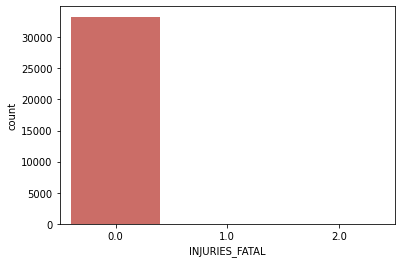

In [78]:
sns.countplot(x='INJURIES_FATAL', data=data, palette='hls')
plt.show()

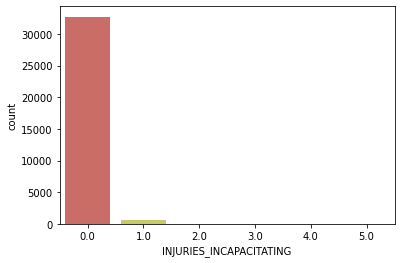

In [79]:

sns.countplot(x='INJURIES_INCAPACITATING', data=data, palette='hls')
plt.show()

In [10]:
######
#predict injuries

data['INJURIES_FATAL']=np.where(data['INJURIES_FATAL'] =='1.0', '1', data['INJURIES_FATAL'])#yes
data['INJURIES_FATAL']=np.where(data['INJURIES_FATAL'] =='2.0', '1', data['INJURIES_FATAL'])
data['INJURIES_FATAL']=np.where(data['INJURIES_FATAL'] =='0.0', '0', data['INJURIES_FATAL'])#no
data['INJURIES_FATAL']=np.where(data['INJURIES_FATAL'] =='nan', '0', data['INJURIES_FATAL'])#assume

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [11]:
######
data['INJURIES_FATAL'].value_counts()

0    33374
1       34
Name: INJURIES_FATAL, dtype: int64

In [12]:
#imbalanced data PER
count_n = len(data[data['INJURIES_FATAL']=='0'])
count_y = len(data[data['INJURIES_FATAL']=='1'])
pct_of_n = count_n/(count_n+count_y)
print("percentage of no fatal injuries", pct_of_n*100)
pct_of_y = count_y/(count_n+count_y)
print("percentage of fatal injuries", pct_of_y*100)

percentage of no fatal injuries 99.89822796934867
percentage of fatal injuries 0.101772030651341


In [15]:
#more exploration
data.groupby('INJURIES_FATAL').mean()

,POSTED_SPEED_LIMIT,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
INJURIES_FATAL,,,,,,,,,,,,
0,28.418559,1250.498682,2.037814,0.193632,0.021598,0.109522,0.062511,2.031781,0.0,13.153203,4.122730,6.660274
1,30.147059,970.117647,2.117647,1.735294,0.352941,0.088235,0.235294,1.000000,0.0,12.000000,4.205882,6.882353


In [98]:
data.groupby('DEVICE_CONDITION').mean()

,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,LATITUDE,LONGITUDE
DEVICE_CONDITION,,,,,,,,,,
FUNCTIONING IMPROPERLY,1091.676471,2.029412,0.211765,0.023529,0.111765,0.076471,2.388235,0.0,41.846627,-87.671314
FUNCTIONING PROPERLY,1206.630998,2.061316,0.284828,0.030684,0.157416,0.095538,2.304972,0.0,41.850338,-87.660245
MISSING,1125.200000,2.200000,0.400000,0.000000,0.200000,0.200000,2.200000,0.0,41.719005,-87.632481
NO CONTROLS,1276.844040,2.026702,0.140375,0.016961,0.080125,0.042196,1.861082,0.0,41.860028,-87.682028
NOT FUNCTIONING,1208.513274,2.000000,0.194690,0.017699,0.115044,0.061947,2.026549,0.0,41.853092,-87.687285
OTHER,1328.142322,2.014981,0.278195,0.045113,0.165414,0.067669,2.146617,0.0,41.875947,-87.684453
UNKNOWN,1255.267416,2.011798,0.181511,0.014656,0.101466,0.064825,1.997745,0.0,41.860505,-87.678018
WORN REFLECTIVE MATERIAL,1435.727273,1.818182,0.000000,0.000000,0.000000,0.000000,2.090909,0.0,41.927724,-87.655967


In [99]:
data.groupby('WEATHER_CONDITION').mean()

,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,LATITUDE,LONGITUDE
WEATHER_CONDITION,,,,,,,,,,
"BLOWING SAND, SOIL, DIRT",414.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,41.757047,-87.567615
BLOWING SNOW,1319.200000,2.200000,0.600000,0.400000,0.200000,0.000000,1.800000,0.0,41.913851,-87.715009
CLEAR,1240.881147,2.039898,0.198385,0.021924,0.113330,0.062175,2.048056,0.0,41.857101,-87.675871
CLOUDY/OVERCAST,1333.894495,2.055963,0.213431,0.021159,0.110396,0.079117,2.033119,0.0,41.863364,-87.683306
FOG/SMOKE/HAZE,1059.508475,2.050847,0.169492,0.033898,0.084746,0.050847,2.033898,0.0,41.848052,-87.655914
FREEZING RAIN/DRIZZLE,1352.565217,2.065217,0.217391,0.021739,0.152174,0.043478,2.152174,0.0,41.883355,-87.677797
OTHER,1250.601695,2.067797,0.245763,0.008475,0.093220,0.144068,2.059322,0.0,41.867002,-87.673155
RAIN,1264.564388,2.049921,0.228216,0.029684,0.121928,0.075327,2.105650,0.0,41.845190,-87.651233
SEVERE CROSS WIND GATE,1569.000000,1.833333,0.000000,0.000000,0.000000,0.000000,1.666667,0.0,41.866297,-87.694723


In [100]:
data.groupby('LIGHTING_CONDITION').mean()

,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,LATITUDE,LONGITUDE
LIGHTING_CONDITION,,,,,,,,,,
DARKNESS,1195.592899,2.008284,0.182088,0.018387,0.113879,0.048636,1.918149,0.0,41.852549,-87.674437
"DARKNESS, LIGHTED ROAD",1248.031259,2.061549,0.258163,0.033625,0.149368,0.072669,1.977352,0.0,41.852226,-87.666748
DAWN,1167.739550,2.030547,0.182848,0.029126,0.100324,0.053398,1.906149,0.0,41.853676,-87.677971
DAYLIGHT,1250.609739,2.034717,0.182379,0.019113,0.100032,0.062543,2.084327,0.0,41.858015,-87.675887
DUSK,1271.108242,2.042701,0.211155,0.017928,0.122510,0.070717,2.152390,0.0,41.853384,-87.679673
UNKNOWN,1366.869604,1.991007,0.049729,0.006329,0.022604,0.019892,1.456600,0.0,41.870289,-87.679376


In [101]:
data.groupby('DAMAGE').mean()

,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,LATITUDE,LONGITUDE
DAMAGE,,,,,,,,,,
$500 OR LESS,1254.416802,1.977892,0.202939,0.023560,0.124563,0.054117,1.923023,0.0,41.863279,-87.673918
"$501 - $1,500",1308.681684,1.999158,0.081435,0.006962,0.041561,0.032700,2.071414,0.0,41.864746,-87.680935
"OVER $1,500",1220.968946,2.069808,0.248658,0.028839,0.139132,0.079102,2.034617,0.0,41.851315,-87.670832


Text(0, 0.5, 'Frequency')

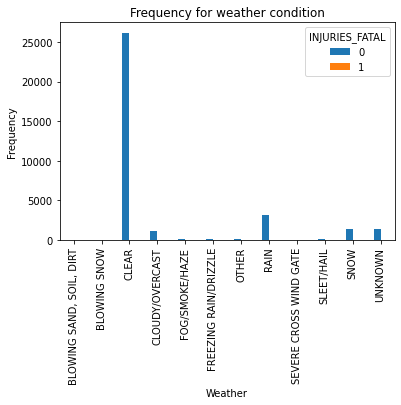

In [103]:
#visulization
%matplotlib inline
pd.crosstab(data.WEATHER_CONDITION,data.INJURIES_FATAL).plot(kind='bar')
plt.title('Frequency for weather condition')
plt.xlabel('Weather')
plt.ylabel('Frequency')
#plt.savefig('name')

#observations: depends on weather somehow

In [105]:
data['WEATHER_CONDITION'].value_counts()

CLEAR                       26192
RAIN                         3145
SNOW                         1351
UNKNOWN                      1334
CLOUDY/OVERCAST              1090
OTHER                         118
SLEET/HAIL                     61
FOG/SMOKE/HAZE                 59
FREEZING RAIN/DRIZZLE          46
SEVERE CROSS WIND GATE          6
BLOWING SNOW                    5
BLOWING SAND, SOIL, DIRT        1
Name: WEATHER_CONDITION, dtype: int64

Text(0, 0.5, 'Frequency')

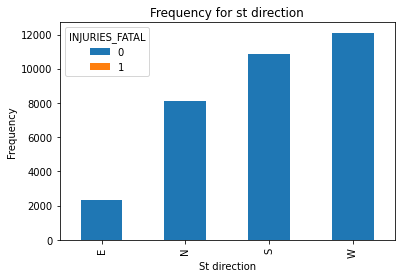

In [108]:
#cols
#['CRASH_RECORD_ID','RD_NO','CRASH_DATE','POSTED_SPEED_LIMIT','DEVICE_CONDITION','WEATHER_CONDITION',
#  'LIGHTING_CONDITION','FIRST_CRASH_TYPE','TRAFFICWAY_TYPE','ALIGNMENT','ROADWAY_SURFACE_COND','ROAD_DEFECT','CRASH_TYPE',
#  'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE','SEC_CONTRIBUTORY_CAUSE','STREET_DIRECTION','BEAT_OF_OCCURRENCE','NUM_UNITS',
#  'MOST_SEVERE_INJURY','INJURIES_TOTAL' , 'INJURIES_FATAL','INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',      
#  'INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NO_INDICATION','INJURIES_UNKNOWN','LATITUDE','LONGITUDE','LOCATION']

pd.crosstab(data.STREET_DIRECTION,data.INJURIES_FATAL).plot(kind='bar', stacked=True)
plt.title('Frequency for st direction')
plt.xlabel('St direction')
plt.ylabel('Frequency')

In [116]:
data['CRASH_TYPE'].value_counts()

NO INJURY / DRIVE AWAY              24067
INJURY AND / OR TOW DUE TO CRASH     9341
Name: CRASH_TYPE, dtype: int64

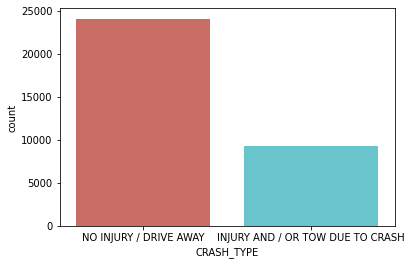

In [117]:
sns.countplot(x='CRASH_TYPE', data=data, palette='hls')
plt.show()

In [119]:
#check
data['BEAT_OF_OCCURRENCE'].unique()

array([ 225,  511,  222,  834, 1921, 1113, 1655, 1733, 2411, 2031, 2212,
       1822, 1654, 1653,  632, 1922, 1132, 1221,  434, 1433, 2423, 1115,
       2512, 2533, 1724, 1431, 1652, 1712, 1424,  132,  213,  623, 1134,
        322, 1613, 2011, 1632,  412, 1731, 2032, 1524, 1834,  922, 1624,
       1434,  812, 1913, 1722, 2012,  713, 1411, 1412,  411, 2223, 1213,
        624, 1011, 2413, 1215, 1235,  712, 1933, 1032, 1022,  331, 1023,
        621, 2522, 1123, 1231,  924, 1711, 1915,  231,  811, 2232, 1723,
       1621, 1131, 1924,  835, 1012, 1824, 2513, 2525,  913, 1651,  113,
       1013, 2514,  622,  911, 1112,  912,  813,  825,  232,  431,  212,
       1713,  914,  313,  821, 1422, 1814,  224, 1225, 1623, 1911,  423,
       2432, 1031,  722, 2422,  524, 2211, 1833, 2515, 1934, 1232, 2024,
       1222,  114, 1133,  833,  215, 2535, 1121,  925,  711,  921, 1811,
       2511,  815, 1732, 1135, 1024, 2524, 2523,  211, 1421,  334, 1423,
       1531,  221,  523, 2013,  121,  634,  614, 10

In [139]:
data['MOST_SEVERE_INJURY'].unique()#CRASH_HOUR #MOST_SEVERE_INJURY

array(['NO INDICATION OF INJURY', 'NONINCAPACITATING INJURY',
       'REPORTED, NOT EVIDENT', 'INCAPACITATING INJURY', nan, 'FATAL'],
      dtype=object)

In [130]:
#old
crash_df2=pd.read_csv('crashes.sample2020.csv')
df_dt=crash_df2[['CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']]
df_dt.head()

,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,8,3,6
1,11,4,5
2,12,4,5
3,11,3,7
4,22,5,10


In [142]:
#combine = [data, df_dt]
df_dt['CRASH_HOUR'].unique()

array([ 8, 11, 12, 22, 15,  1, 18, 17, 21,  9, 14, 10, 20, 13,  7, 19,  2,
        6, 16,  0, 23,  5,  4,  3])

In [13]:
######
#Create dummy variables ! redo!
#variables with only two values, zero and one.
#cols
#['CRASH_RECORD_ID','RD_NO','CRASH_DATE','POSTED_SPEED_LIMIT','DEVICE_CONDITION','WEATHER_CONDITION',
#  'LIGHTING_CONDITION','TRAFFICWAY_TYPE','ROADWAY_SURFACE_COND','ROAD_DEFECT','STREET_DIRECTION','CRASH_DAY_OF_WEEK', 'CRASH_MONTH']

cat_vars=['DEVICE_CONDITION','WEATHER_CONDITION','LIGHTING_CONDITION','TRAFFICWAY_TYPE','ROADWAY_SURFACE_COND',
          'ROAD_DEFECT','STREET_DIRECTION','CRASH_DAY_OF_WEEK', 'CRASH_MONTH'] #havent add time
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)#problem
    data1=data.merge(cat_list,left_index=True ,right_index=True) #set index
    data=data1
cat_vars=['DEVICE_CONDITION','WEATHER_CONDITION','LIGHTING_CONDITION','TRAFFICWAY_TYPE','ROADWAY_SURFACE_COND',
          'ROAD_DEFECT','STREET_DIRECTION','CRASH_DAY_OF_WEEK', 'CRASH_MONTH']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

#'POSTED_SPEED_LIMIT',time not added yet

In [26]:
#check values
data['TRAFFICWAY_TYPE'].unique()

array(['DIVIDED - W/MEDIAN BARRIER', 'NOT DIVIDED', 'PARKING LOT',
       'DIVIDED - W/MEDIAN (NOT RAISED)', 'OTHER', 'UNKNOWN', 'ONE-WAY',
       'CENTER TURN LANE', 'T-INTERSECTION', 'Y-INTERSECTION', 'RAMP',
       'FOUR WAY', 'L-INTERSECTION', 'NOT REPORTED',
       'FIVE POINT, OR MORE', 'ALLEY', 'DRIVEWAY', 'TRAFFIC ROUTE',
       'UNKNOWN INTERSECTION TYPE', 'ROUNDABOUT'], dtype=object)

In [14]:
data_final=data[to_keep]
data_final.columns.values

array(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'FIRST_CRASH_TYPE', 'ALIGNMENT', 'CRASH_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
       'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'DEVICE_CONDITION_FUNCTIONING IMPROPERLY',
       'DEVICE_CONDITION_FUNCTIONING PROPERLY',
       'DEVICE_CONDITION_MISSING', 'DEVICE_CONDITION_NO CONTROLS',
       'DEVICE_CONDITION_NOT FUNCTIONING', 'DEVICE_CONDITION_OTHER',
       'DEVICE_CONDITION_UNKNOWN',
       'DEVICE_CONDITION_WORN REFLECTIVE MATERIAL',
       'WEATHER_CONDITION_BLOWING SAND, SOIL, DIRT',
       'WEATHER_CONDITION_BLOWING SNOW', 'WEATHER_CONDITION_CLEAR',
       'WEATHER_CONDITION_CLOUDY/OVERCAST',
       'WEATHER_CONDITION_FOG/SMOKE/HAZE',
    

In [16]:
pd.set_option('display.max_columns', 100)#display all
df_final = data_final.iloc[:, 13:105]
df_final.head(100)

,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,DEVICE_CONDITION_FUNCTIONING IMPROPERLY,DEVICE_CONDITION_FUNCTIONING PROPERLY,DEVICE_CONDITION_MISSING,DEVICE_CONDITION_NO CONTROLS,DEVICE_CONDITION_NOT FUNCTIONING,DEVICE_CONDITION_OTHER,DEVICE_CONDITION_UNKNOWN,DEVICE_CONDITION_WORN REFLECTIVE MATERIAL,"WEATHER_CONDITION_BLOWING SAND, SOIL, DIRT",WEATHER_CONDITION_BLOWING SNOW,WEATHER_CONDITION_CLEAR,WEATHER_CONDITION_CLOUDY/OVERCAST,WEATHER_CONDITION_FOG/SMOKE/HAZE,WEATHER_CONDITION_FREEZING RAIN/DRIZZLE,WEATHER_CONDITION_OTHER,WEATHER_CONDITION_RAIN,WEATHER_CONDITION_SEVERE CROSS WIND GATE,WEATHER_CONDITION_SLEET/HAIL,WEATHER_CONDITION_SNOW,WEATHER_CONDITION_UNKNOWN,LIGHTING_CONDITION_DARKNESS,"LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD",LIGHTING_CONDITION_DAWN,LIGHTING_CONDITION_DAYLIGHT,LIGHTING_CONDITION_DUSK,LIGHTING_CONDITION_UNKNOWN,TRAFFICWAY_TYPE_ALLEY,TRAFFICWAY_TYPE_CENTER TURN LANE,TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN (NOT RAISED),TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN BARRIER,TRAFFICWAY_TYPE_DRIVEWAY,"TRAFFICWAY_TYPE_FIVE POINT, OR MORE",TRAFFICWAY_TYPE_FOUR WAY,TRAFFICWAY_TYPE_L-INTERSECTION,TRAFFICWAY_TYPE_NOT DIVIDED,TRAFFICWAY_TYPE_NOT REPORTED,TRAFFICWAY_TYPE_ONE-WAY,TRAFFICWAY_TYPE_OTHER,TRAFFICWAY_TYPE_PARKING LOT,TRAFFICWAY_TYPE_RAMP,TRAFFICWAY_TYPE_ROUNDABOUT,TRAFFICWAY_TYPE_T-INTERSECTION,TRAFFICWAY_TYPE_TRAFFIC ROUTE,TRAFFICWAY_TYPE_UNKNOWN,TRAFFICWAY_TYPE_UNKNOWN INTERSECTION TYPE,TRAFFICWAY_TYPE_Y-INTERSECTION,ROADWAY_SURFACE_COND_DRY,ROADWAY_SURFACE_COND_ICE,ROADWAY_SURFACE_COND_OTHER,"ROADWAY_SURFACE_COND_SAND, MUD, DIRT",ROADWAY_SURFACE_COND_SNOW OR SLUSH,ROADWAY_SURFACE_COND_UNKNOWN,ROADWAY_SURFACE_COND_WET,ROAD_DEFECT_DEBRIS ON ROADWAY,ROAD_DEFECT_NO DEFECTS,ROAD_DEFECT_OTHER,"ROAD_DEFECT_RUT, HOLES",ROAD_DEFECT_SHOULDER DEFECT,ROAD_DEFECT_UNKNOWN,ROAD_DEFECT_WORN SURFACE,STREET_DIRECTION_E,STREET_DIRECTION_N,STREET_DIRECTION_S,STREET_DIRECTION_W,CRASH_DAY_OF_WEEK_1,CRASH_DAY_OF_WEEK_2,CRASH_DAY_OF_WEEK_3,CRASH_DAY_OF_WEEK_4,CRASH_DAY_OF_WEEK_5,CRASH_DAY_OF_WEEK_6,CRASH_DAY_OF_WEEK_7,CRASH_MONTH_1,CRASH_MONTH_2,CRASH_MONTH_3,CRASH_MONTH_4,CRASH_MONTH_5,CRASH_MONTH_6,CRASH_MONTH_7,CRASH_MONTH_8,CRASH_MONTH_9,CRASH_MONTH_10,CRASH_MONTH_11,CRASH_MONTH_12
0,0.0,0,0.0,0.0,0.0,3.0,0.0,8,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.0,0,0.0,0.0,0.0,2.0,0.0,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1.0,0,0.0,1.0,0.0,0.0,0.0,12,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0.0,0,0.0,0.0,0.0,2.0,0.0,11,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.0,0,0.0,0.0,0.0,1.0,0.0,22,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0,0.0,0.0,0.0,4.0,0.0,17,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
96,2.0,0,0.0,0.0,2.0,0.0,0.0,18,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [51]:
######
#drop certain
df1 = df_final.drop(['INJURIES_TOTAL', 'INJURIES_INCAPACITATING','INJURIES_NON_INCAPACITATING','INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NO_INDICATION','INJURIES_UNKNOWN','CRASH_HOUR'], axis=1)
df1.head()

,INJURIES_FATAL,DEVICE_CONDITION_FUNCTIONING IMPROPERLY,DEVICE_CONDITION_FUNCTIONING PROPERLY,DEVICE_CONDITION_MISSING,DEVICE_CONDITION_NO CONTROLS,DEVICE_CONDITION_NOT FUNCTIONING,DEVICE_CONDITION_OTHER,DEVICE_CONDITION_UNKNOWN,DEVICE_CONDITION_WORN REFLECTIVE MATERIAL,"WEATHER_CONDITION_BLOWING SAND, SOIL, DIRT",WEATHER_CONDITION_BLOWING SNOW,WEATHER_CONDITION_CLEAR,WEATHER_CONDITION_CLOUDY/OVERCAST,WEATHER_CONDITION_FOG/SMOKE/HAZE,WEATHER_CONDITION_FREEZING RAIN/DRIZZLE,WEATHER_CONDITION_OTHER,WEATHER_CONDITION_RAIN,WEATHER_CONDITION_SEVERE CROSS WIND GATE,WEATHER_CONDITION_SLEET/HAIL,WEATHER_CONDITION_SNOW,WEATHER_CONDITION_UNKNOWN,LIGHTING_CONDITION_DARKNESS,"LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD",LIGHTING_CONDITION_DAWN,LIGHTING_CONDITION_DAYLIGHT,LIGHTING_CONDITION_DUSK,LIGHTING_CONDITION_UNKNOWN,TRAFFICWAY_TYPE_ALLEY,TRAFFICWAY_TYPE_CENTER TURN LANE,TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN (NOT RAISED),TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN BARRIER,TRAFFICWAY_TYPE_DRIVEWAY,"TRAFFICWAY_TYPE_FIVE POINT, OR MORE",TRAFFICWAY_TYPE_FOUR WAY,TRAFFICWAY_TYPE_L-INTERSECTION,TRAFFICWAY_TYPE_NOT DIVIDED,TRAFFICWAY_TYPE_NOT REPORTED,TRAFFICWAY_TYPE_ONE-WAY,TRAFFICWAY_TYPE_OTHER,TRAFFICWAY_TYPE_PARKING LOT,TRAFFICWAY_TYPE_RAMP,TRAFFICWAY_TYPE_ROUNDABOUT,TRAFFICWAY_TYPE_T-INTERSECTION,TRAFFICWAY_TYPE_TRAFFIC ROUTE,TRAFFICWAY_TYPE_UNKNOWN,TRAFFICWAY_TYPE_UNKNOWN INTERSECTION TYPE,TRAFFICWAY_TYPE_Y-INTERSECTION,ROADWAY_SURFACE_COND_DRY,ROADWAY_SURFACE_COND_ICE,ROADWAY_SURFACE_COND_OTHER,"ROADWAY_SURFACE_COND_SAND, MUD, DIRT",ROADWAY_SURFACE_COND_SNOW OR SLUSH,ROADWAY_SURFACE_COND_UNKNOWN,ROADWAY_SURFACE_COND_WET,ROAD_DEFECT_DEBRIS ON ROADWAY,ROAD_DEFECT_NO DEFECTS,ROAD_DEFECT_OTHER,"ROAD_DEFECT_RUT, HOLES",ROAD_DEFECT_SHOULDER DEFECT,ROAD_DEFECT_UNKNOWN,ROAD_DEFECT_WORN SURFACE,STREET_DIRECTION_E,STREET_DIRECTION_N,STREET_DIRECTION_S,STREET_DIRECTION_W,CRASH_DAY_OF_WEEK_1,CRASH_DAY_OF_WEEK_2,CRASH_DAY_OF_WEEK_3,CRASH_DAY_OF_WEEK_4,CRASH_DAY_OF_WEEK_5,CRASH_DAY_OF_WEEK_6,CRASH_DAY_OF_WEEK_7,CRASH_MONTH_1,CRASH_MONTH_2,CRASH_MONTH_3,CRASH_MONTH_4,CRASH_MONTH_5,CRASH_MONTH_6,CRASH_MONTH_7,CRASH_MONTH_8,CRASH_MONTH_9,CRASH_MONTH_10,CRASH_MONTH_11,CRASH_MONTH_12
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [52]:
df_final.shape

(33408, 91)

In [53]:
pd.DataFrame(df_final).fillna(0)#fill na

,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,DEVICE_CONDITION_FUNCTIONING IMPROPERLY,DEVICE_CONDITION_FUNCTIONING PROPERLY,DEVICE_CONDITION_MISSING,DEVICE_CONDITION_NO CONTROLS,DEVICE_CONDITION_NOT FUNCTIONING,DEVICE_CONDITION_OTHER,DEVICE_CONDITION_UNKNOWN,DEVICE_CONDITION_WORN REFLECTIVE MATERIAL,"WEATHER_CONDITION_BLOWING SAND, SOIL, DIRT",WEATHER_CONDITION_BLOWING SNOW,WEATHER_CONDITION_CLEAR,WEATHER_CONDITION_CLOUDY/OVERCAST,WEATHER_CONDITION_FOG/SMOKE/HAZE,WEATHER_CONDITION_FREEZING RAIN/DRIZZLE,WEATHER_CONDITION_OTHER,WEATHER_CONDITION_RAIN,WEATHER_CONDITION_SEVERE CROSS WIND GATE,WEATHER_CONDITION_SLEET/HAIL,WEATHER_CONDITION_SNOW,WEATHER_CONDITION_UNKNOWN,LIGHTING_CONDITION_DARKNESS,"LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD",LIGHTING_CONDITION_DAWN,LIGHTING_CONDITION_DAYLIGHT,LIGHTING_CONDITION_DUSK,LIGHTING_CONDITION_UNKNOWN,TRAFFICWAY_TYPE_ALLEY,TRAFFICWAY_TYPE_CENTER TURN LANE,TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN (NOT RAISED),TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN BARRIER,TRAFFICWAY_TYPE_DRIVEWAY,"TRAFFICWAY_TYPE_FIVE POINT, OR MORE",TRAFFICWAY_TYPE_FOUR WAY,TRAFFICWAY_TYPE_L-INTERSECTION,TRAFFICWAY_TYPE_NOT DIVIDED,TRAFFICWAY_TYPE_NOT REPORTED,TRAFFICWAY_TYPE_ONE-WAY,TRAFFICWAY_TYPE_OTHER,TRAFFICWAY_TYPE_PARKING LOT,TRAFFICWAY_TYPE_RAMP,TRAFFICWAY_TYPE_ROUNDABOUT,TRAFFICWAY_TYPE_T-INTERSECTION,TRAFFICWAY_TYPE_TRAFFIC ROUTE,TRAFFICWAY_TYPE_UNKNOWN,TRAFFICWAY_TYPE_UNKNOWN INTERSECTION TYPE,TRAFFICWAY_TYPE_Y-INTERSECTION,ROADWAY_SURFACE_COND_DRY,ROADWAY_SURFACE_COND_ICE,ROADWAY_SURFACE_COND_OTHER,"ROADWAY_SURFACE_COND_SAND, MUD, DIRT",ROADWAY_SURFACE_COND_SNOW OR SLUSH,ROADWAY_SURFACE_COND_UNKNOWN,ROADWAY_SURFACE_COND_WET,ROAD_DEFECT_DEBRIS ON ROADWAY,ROAD_DEFECT_NO DEFECTS,ROAD_DEFECT_OTHER,"ROAD_DEFECT_RUT, HOLES",ROAD_DEFECT_SHOULDER DEFECT,ROAD_DEFECT_UNKNOWN,ROAD_DEFECT_WORN SURFACE,STREET_DIRECTION_E,STREET_DIRECTION_N,STREET_DIRECTION_S,STREET_DIRECTION_W,CRASH_DAY_OF_WEEK_1,CRASH_DAY_OF_WEEK_2,CRASH_DAY_OF_WEEK_3,CRASH_DAY_OF_WEEK_4,CRASH_DAY_OF_WEEK_5,CRASH_DAY_OF_WEEK_6,CRASH_DAY_OF_WEEK_7,CRASH_MONTH_1,CRASH_MONTH_2,CRASH_MONTH_3,CRASH_MONTH_4,CRASH_MONTH_5,CRASH_MONTH_6,CRASH_MONTH_7,CRASH_MONTH_8,CRASH_MONTH_9,CRASH_MONTH_10,CRASH_MONTH_11,CRASH_MONTH_12
0,0.0,0,0.0,0.0,0.0,3.0,0.0,8,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.0,0,0.0,0.0,0.0,2.0,0.0,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1.0,0,0.0,1.0,0.0,0.0,0.0,12,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0.0,0,0.0,0.0,0.0,2.0,0.0,11,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.0,0,0.0,0.0,0.0,1.0,0.0,22,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33403,1.0,0,0.0,1.0,0.0,1.0,0.0,11,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
33404,0.0,0,0.0,0.0,0.0,2.0,0.0,9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0

In [53]:
######
#imbalanced data
#Over-sampling using SMOTE


X = df1.loc[:, df1.columns != 'INJURIES_FATAL']
y = df1.loc[:, df1.columns == 'INJURIES_FATAL']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['INJURIES_FATAL'])

# Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['INJURIES_FATAL']=='0']))
print("Number of subscription",len(os_data_y[os_data_y['INJURIES_FATAL']=='1']))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['INJURIES_FATAL']=='0'])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['INJURIES_FATAL']=='1'])/len(os_data_X))

length of oversampled data is  46718
Number of no subscription in oversampled data 23359
Number of subscription 23359
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [55]:
#Recursive Feature Elimination (RFE) - repeatedly construct a model 
#choose either the best or worst performing feature, setting the feature aside and then 
#repeating the process with the rest of the features. 
#This process is applied until all features in the dataset are exhausted. 
#The goal of RFE is to select features by recursively considering smaller and smaller sets of features.
# .support_ attribute is a list of boolean values that are false if the feature was dropped.
data_final_vars=df1.columns.values.tolist()
y=['INJURIES_FATAL']
X=[i for i in data_final_vars if i not in y]

logreg = LogisticRegression()

rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)


/home/bunny/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[False  True False  True False False  True False False False False False
 False False False False False False False False  True  True False  True
 False  True False False  True  True False False  True False  True False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True  True  True  True  True  True False
 False False False False False False False  True False False False]
[46  1 63  1 49 42  1 61 64 62 45  4 39 43 35 24 55 40 28  9  1  1 31  1
 29  1 33 38  1  1 48 57  1 58  1 59  1 30 25 50 60 41 56 37 52 53 11  5
 47 54 20 23 10 51  2 34 32 44  3 36 26 27  6  7  1  1  1  1  1  1  1 13
 21 14 19 16 15 12 18  1  8 17 22]


In [56]:
print(np.where(rfe.support_ == False)[0])

df2=df1

[ 0  2  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 22 24 26 27 30 31 33
 35 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 71 72 73 74 75 76 77 78 80 81 82]


In [59]:
df2.drop(df2.columns[np.where(rfe.support_ == False)[0]], axis=1, inplace=True)
df2.head()

,DEVICE_CONDITION_FUNCTIONING IMPROPERLY,DEVICE_CONDITION_MISSING,DEVICE_CONDITION_OTHER,WEATHER_CONDITION_UNKNOWN,LIGHTING_CONDITION_DARKNESS,LIGHTING_CONDITION_DAWN,LIGHTING_CONDITION_DUSK,TRAFFICWAY_TYPE_CENTER TURN LANE,TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN (NOT RAISED),"TRAFFICWAY_TYPE_FIVE POINT, OR MORE",TRAFFICWAY_TYPE_L-INTERSECTION,TRAFFICWAY_TYPE_NOT REPORTED,STREET_DIRECTION_W,CRASH_DAY_OF_WEEK_1,CRASH_DAY_OF_WEEK_2,CRASH_DAY_OF_WEEK_3,CRASH_DAY_OF_WEEK_4,CRASH_DAY_OF_WEEK_5,CRASH_DAY_OF_WEEK_6,CRASH_MONTH_8,CRASH_MONTH_12
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [60]:
df2.shape

(33408, 21)

In [75]:
y

0        0
1        0
2        0
3        0
4        0
        ..
46713    1
46714    1
46715    1
46716    1
46717    1
Name: INJURIES_FATAL, Length: 46718, dtype: int64

In [62]:
os_data_X.head()

,DEVICE_CONDITION_FUNCTIONING IMPROPERLY,DEVICE_CONDITION_FUNCTIONING PROPERLY,DEVICE_CONDITION_MISSING,DEVICE_CONDITION_NO CONTROLS,DEVICE_CONDITION_NOT FUNCTIONING,DEVICE_CONDITION_OTHER,DEVICE_CONDITION_UNKNOWN,DEVICE_CONDITION_WORN REFLECTIVE MATERIAL,"WEATHER_CONDITION_BLOWING SAND, SOIL, DIRT",WEATHER_CONDITION_BLOWING SNOW,WEATHER_CONDITION_CLEAR,WEATHER_CONDITION_CLOUDY/OVERCAST,WEATHER_CONDITION_FOG/SMOKE/HAZE,WEATHER_CONDITION_FREEZING RAIN/DRIZZLE,WEATHER_CONDITION_OTHER,WEATHER_CONDITION_RAIN,WEATHER_CONDITION_SEVERE CROSS WIND GATE,WEATHER_CONDITION_SLEET/HAIL,WEATHER_CONDITION_SNOW,WEATHER_CONDITION_UNKNOWN,LIGHTING_CONDITION_DARKNESS,"LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD",LIGHTING_CONDITION_DAWN,LIGHTING_CONDITION_DAYLIGHT,LIGHTING_CONDITION_DUSK,LIGHTING_CONDITION_UNKNOWN,TRAFFICWAY_TYPE_ALLEY,TRAFFICWAY_TYPE_CENTER TURN LANE,TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN (NOT RAISED),TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN BARRIER,TRAFFICWAY_TYPE_DRIVEWAY,"TRAFFICWAY_TYPE_FIVE POINT, OR MORE",TRAFFICWAY_TYPE_FOUR WAY,TRAFFICWAY_TYPE_L-INTERSECTION,TRAFFICWAY_TYPE_NOT DIVIDED,TRAFFICWAY_TYPE_NOT REPORTED,TRAFFICWAY_TYPE_ONE-WAY,TRAFFICWAY_TYPE_OTHER,TRAFFICWAY_TYPE_PARKING LOT,TRAFFICWAY_TYPE_RAMP,TRAFFICWAY_TYPE_ROUNDABOUT,TRAFFICWAY_TYPE_T-INTERSECTION,TRAFFICWAY_TYPE_TRAFFIC ROUTE,TRAFFICWAY_TYPE_UNKNOWN,TRAFFICWAY_TYPE_UNKNOWN INTERSECTION TYPE,TRAFFICWAY_TYPE_Y-INTERSECTION,ROADWAY_SURFACE_COND_DRY,ROADWAY_SURFACE_COND_ICE,ROADWAY_SURFACE_COND_OTHER,"ROADWAY_SURFACE_COND_SAND, MUD, DIRT",ROADWAY_SURFACE_COND_SNOW OR SLUSH,ROADWAY_SURFACE_COND_UNKNOWN,ROADWAY_SURFACE_COND_WET,ROAD_DEFECT_DEBRIS ON ROADWAY,ROAD_DEFECT_NO DEFECTS,ROAD_DEFECT_OTHER,"ROAD_DEFECT_RUT, HOLES",ROAD_DEFECT_SHOULDER DEFECT,ROAD_DEFECT_UNKNOWN,ROAD_DEFECT_WORN SURFACE,STREET_DIRECTION_E,STREET_DIRECTION_N,STREET_DIRECTION_S,STREET_DIRECTION_W,CRASH_DAY_OF_WEEK_1,CRASH_DAY_OF_WEEK_2,CRASH_DAY_OF_WEEK_3,CRASH_DAY_OF_WEEK_4,CRASH_DAY_OF_WEEK_5,CRASH_DAY_OF_WEEK_6,CRASH_DAY_OF_WEEK_7,CRASH_MONTH_1,CRASH_MONTH_2,CRASH_MONTH_3,CRASH_MONTH_4,CRASH_MONTH_5,CRASH_MONTH_6,CRASH_MONTH_7,CRASH_MONTH_8,CRASH_MONTH_9,CRASH_MONTH_10,CRASH_MONTH_11,CRASH_MONTH_12
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [63]:
os_data_y.head()

,INJURIES_FATAL
0,0
1,0
2,0
3,0
4,0


In [82]:
os_data_y['INJURIES_FATAL']=os_data_y['INJURIES_FATAL'].apply(pd.to_numeric) 

In [83]:
print(os_data_y['INJURIES_FATAL'].dtypes) 

int64


In [85]:
#The RFE has helped us select the following features, in df2:

#Implementing the model
cols_f=['DEVICE_CONDITION_FUNCTIONING IMPROPERLY','DEVICE_CONDITION_MISSING','DEVICE_CONDITION_OTHER',
      'WEATHER_CONDITION_UNKNOWN', 'LIGHTING_CONDITION_DARKNESS', 'LIGHTING_CONDITION_DAWN', 
      'LIGHTING_CONDITION_DUSK', 'TRAFFICWAY_TYPE_CENTER TURN LANE', 'TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN (NOT RAISED)',
      'TRAFFICWAY_TYPE_FIVE POINT, OR MORE','TRAFFICWAY_TYPE_L-INTERSECTION','TRAFFICWAY_TYPE_NOT REPORTED',
      'STREET_DIRECTION_W','CRASH_DAY_OF_WEEK_1', 'CRASH_DAY_OF_WEEK_2', 'CRASH_DAY_OF_WEEK_3','CRASH_DAY_OF_WEEK_4',
      'CRASH_DAY_OF_WEEK_5','CRASH_DAY_OF_WEEK_6', 'CRASH_MONTH_8', 'CRASH_MONTH_12'] 
X=os_data_X[cols_f]
y=os_data_y['INJURIES_FATAL']


logit_model=sm.Logit(y,X)
result=logit_model.fit(method='bfgs')
print(result.summary2())


#observations: reject the null hypothesis if the probability of the event {Z≥|z|} is lower than the conventional threshold of 0.05. 

         Current function value: 0.443409
         Iterations: 35
         Function evaluations: 61
         Gradient evaluations: 61
                                         Results: Logit
Model:                         Logit                      Pseudo R-squared:           0.360     
Dependent Variable:            INJURIES_FATAL             AIC:                        41472.3495
Date:                          2020-11-10 12:29           BIC:                        41656.1391
No. Observations:              46718                      Log-Likelihood:             -20715.   
Df Model:                      20                         LL-Null:                    -32382.   
Df Residuals:                  46697                      LLR p-value:                0.0000    
Converged:                     0.0000                     Scale:                      1.0000    
------------------------------------------------------------------------------------------------
                                  

/home/bunny/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [77]:
np.asarray(X)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [78]:
np.asarray(y)

array(['0', '0', '0', ..., '1', '1', '1'], dtype=object)

In [86]:
#check p value
cols2=['DEVICE_CONDITION_OTHER',
      'WEATHER_CONDITION_UNKNOWN', 'LIGHTING_CONDITION_DARKNESS', 'LIGHTING_CONDITION_DAWN', 
      'LIGHTING_CONDITION_DUSK', 'TRAFFICWAY_TYPE_CENTER TURN LANE', 
       'TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN (NOT RAISED)',
      'STREET_DIRECTION_W','CRASH_DAY_OF_WEEK_1', 'CRASH_DAY_OF_WEEK_2',
       'CRASH_DAY_OF_WEEK_3','CRASH_DAY_OF_WEEK_4',
      'CRASH_DAY_OF_WEEK_5','CRASH_DAY_OF_WEEK_6', 'CRASH_MONTH_12'] 
X=os_data_X[cols2]
y=os_data_y['INJURIES_FATAL']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.429940
         Iterations: 35
                                               Results: Logit
Model:                             Logit                          Pseudo R-squared:               0.380     
Dependent Variable:                INJURIES_FATAL                 AIC:                            40201.8998
Date:                              2020-11-10 12:38               BIC:                            40333.1780
No. Observations:                  46718                          Log-Likelihood:                 -20086.   
Df Model:                          14                             LL-Null:                        -32382.   
Df Residuals:                      46703                          LLR p-value:                    0.0000    
Converged:                         0.0000                         Scale:                          1.0000    
No. Iterations:                    35.0000                                                                  


/home/bunny/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [89]:
###
#check p value
cols3=['DEVICE_CONDITION_OTHER',
      'WEATHER_CONDITION_UNKNOWN', 'LIGHTING_CONDITION_DARKNESS', 
       'TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN (NOT RAISED)',
      'STREET_DIRECTION_W','CRASH_DAY_OF_WEEK_1', 'CRASH_DAY_OF_WEEK_2',
       'CRASH_DAY_OF_WEEK_3','CRASH_DAY_OF_WEEK_4',
      'CRASH_DAY_OF_WEEK_5','CRASH_DAY_OF_WEEK_6', 'CRASH_MONTH_12'] 
X=os_data_X[cols3]
y=os_data_y['INJURIES_FATAL']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.451482
         Iterations: 35
                                            Results: Logit
Model:                           Logit                        Pseudo R-squared:             0.349     
Dependent Variable:              INJURIES_FATAL               AIC:                          42208.6969
Date:                            2020-11-10 12:41             BIC:                          42313.7195
No. Observations:                46718                        Log-Likelihood:               -21092.   
Df Model:                        11                           LL-Null:                      -32382.   
Df Residuals:                    46706                        LLR p-value:                  0.0000    
Converged:                       0.0000                       Scale:                        1.0000    
No. Iterations:                  35.0000                                                              
---------------------------------------------------

/home/bunny/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [106]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver = 'lbfgs')


In [107]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [108]:
#predict test set
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [110]:

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7002    2]
 [1551 5461]]


In [112]:
#The precision is the ratio tp / (tp + fp)
#The recall is the ratio tp / (tp + fn)

print(classification_report(y_test, y_pred))

#Interpretation: Of the entire test set, 
#91% of 
#Of the entire test set, 
#89% of the predicted that were happened.

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      7004
           1       1.00      0.78      0.88      7012

    accuracy                           0.89     14016
   macro avg       0.91      0.89      0.89     14016
weighted avg       0.91      0.89      0.89     14016



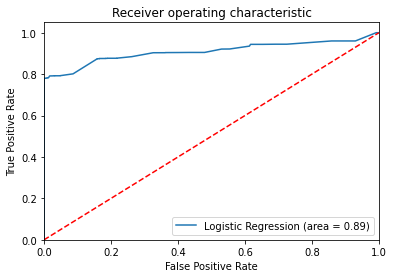

In [114]:
#ROC curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()